## 16.1.1// DF and series read

In [19]:
import pandas as pd
nsfg=pd.read_hdf('G:\\datacamp\\16. Exploratory Data Analysis\\nsfg.hdf5')
# Display the number of rows and columns
nsfg.shape

# Display the names of the columns
print(nsfg.columns)

# Select column birthwgt_oz1: ounces
ounces = nsfg['birthwgt_oz1']

# Print the first 5 elements of ounces
print(ounces.head())

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')
0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64


# 16.1.2//Clean and validate data

In [20]:
pounds=nsfg['birthwgt_lb1']
print(pounds.describe())
pounds.value_counts().sort_index() ####sort_index() index onujayi sort kore

count    6485.000000
mean        8.055204
std        11.178893
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        99.000000
Name: birthwgt_lb1, dtype: float64


0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
98.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64

In [21]:
import numpy as np
ounces=ounces.replace([98,99],np.nan)
pounds.replace([98,99],np.nan,inplace=True)   ### inplace use na krle pounds e assign kora lagto
pounds.value_counts().sort_index()

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
Name: birthwgt_lb1, dtype: int64

In [22]:
ounces.value_counts().sort_index()

0.0     757
1.0     297
2.0     429
3.0     393
4.0     386
5.0     407
6.0     543
7.0     346
8.0     518
9.0     377
10.0    295
11.0    418
12.0    388
13.0    275
14.0    258
15.0    268
Name: birthwgt_oz1, dtype: int64

In [15]:
birth_weight=pounds+ounces/16
birth_weight.isna().sum()

3003

#### E//Clean a variable
In the NSFG dataset, the variable 'nbrnaliv' records the number of babies born alive at the end of a pregnancy.

If you use .value_counts() to view the responses, you'll see that the value 8 appears once, and if you consult the codebook, you'll see that this value indicates that the respondent refused to answer the question.

Your job in this exercise is to replace this value with np.nan. Recall from the video how Allen replaced the values 98 and 99 in the ounces column using the .replace() method:

In [ ]:
# Replace the value 8 with NaN
nsfg['nbrnaliv'].replace(8, np.nan, inplace=True)

# Print the values and their frequencies
print(nsfg['nbrnaliv'].value_counts())

#### E//Compute a variable
For each pregnancy in the NSFG dataset, the variable 'agecon' encodes the respondent's age at conception, and 'agepreg' the respondent's age at the end of the pregnancy.

Both variables are recorded as integers with two implicit decimal places, so the value 2575 means that the respondent's age was 25.75.
**Select 'agecon' and 'agepreg', divide them by 100, and assign them to the local variables agecon and agepreg//////2//Compute the difference, which is an estimate of the duration of the pregnancy. Keep in mind that for each pregnancy, agepreg will be larger than agecon.////3///

In [16]:
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100
preg_length = agepreg-agecon
preg_length.describe()

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64

# 16.1.3//Filter and visualize

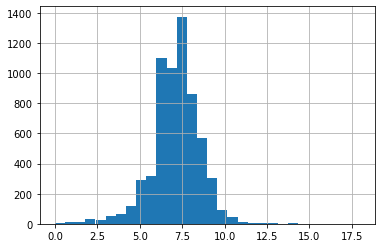

In [21]:
import matplotlib.pyplot as plt
birth_weight.hist(bins=30)
plt.show()

#### E//Make a histogram
Histograms are one of the most useful tools in exploratory data analysis. They quickly give you an overview of the distribution of a variable, that is, what values the variable can have, and how many times each value appears.

As we saw in a previous exercise, the NSFG dataset includes a variable 'agecon' that records age at conception for each pregnancy. Here, you're going to plot a histogram of this variable. You'll use the bins parameter that you saw in the video, and also a new parameter - histtype - which you can read more about here in the matplotlib documentation. Learning how to read documentation is an essential skill. If you want to learn more about matplotlib, you can check out DataCamp's Introduction to Data Visualization with Matplotlib course.

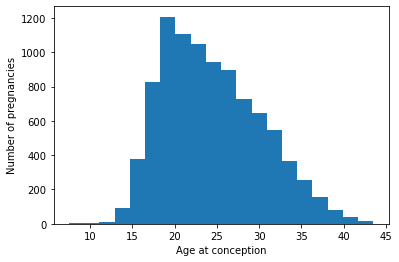

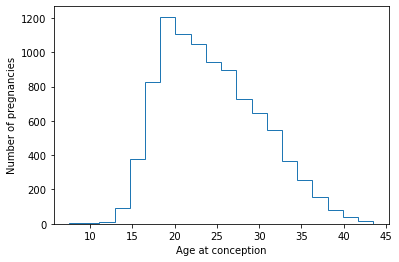

In [23]:
# Plot the histogram
plt.hist(agecon, bins=20)

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()
# Plot the histogram
plt.hist(agecon, bins=20, histtype='step')

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

#### E//Compute birth weight
Now let's pull together the steps in this chapter to compute the average birth weight for full-term babies.

I've provided a function, resample_rows_weighted, that takes the NSFG data and resamples it using the sampling weights in wgt2013_2015. The result is a sample that is representative of the U.S. population.

Then I extract birthwgt_lb1 and birthwgt_oz1, replace special codes with NaN, and compute total birth weight in pounds, birth_weight.

In [ ]:
def resample_rows_weighted(df, column='finalwgt', seed=17):
    """Resamples a DataFrame using probabilities proportional to given column.

    df: DataFrame
    column: string column name to use as weights

    returns: DataFrame
    """
    np.random.seed(seed)
    weights = df[column] / sum(df[column])
    indices = np.random.choice(df.index, len(df), replace=True, p=weights)
    sample = df.loc[indices]
    return sample

In [25]:
# Create a Boolean Series for full-term babies
full_term = nsfg['prglngth']>=37

# Select the weights of full-term babies
full_term_weight = birth_weight[full_term]

# Compute the mean weight of full-term babies
print(full_term_weight.mean())

7.372323879231473


#### E//Filter
In the previous exercise, you computed the mean birth weight for full-term babies; you filtered out preterm babies because their distribution of weight is different.

The distribution of weight is also different for multiple births, like twins and triplets. In this exercise, you'll filter them out, too, and see what effect it has on the mean
**Use the variable 'nbrnaliv' to make a Boolean Series that is True for single births (where 'nbrnaliv' equals 1) and False otherwise.
Use Boolean Series and logical operators to select single, full-term babies and compute their mean birth weight.
For comparison, select multiple, full-term babies and compute their mean birth weight.**

In [26]:
# Filter full-term babies
full_term = nsfg['prglngth'] >= 37

# Filter single births
single = nsfg['nbrnaliv']==1

# Compute birth weight for single full-term babies
single_full_term_weight = birth_weight[single & full_term]
print('Single full-term mean:', single_full_term_weight.mean())

# Compute birth weight for multiple full-term babies
mult_full_term_weight = birth_weight[full_term & ~single]
print('Multiple full-term mean:', mult_full_term_weight.mean())

Single full-term mean: 7.385643450184502
Multiple full-term mean: 5.768055555555556


# 16.2 Distribution
## 16.2.1//Probability mass function
Possible values of a distribution and their probabilities

In [130]:
gss=pd.read_hdf('G:\\datacamp\\16. Exploratory Data Analysis\\gss.hdf5','gss')
print(gss.head())
gss.columns

   year   age  cohort  sex  race  educ  realinc  gunlaw  grass  wtssall
0  1972  26.0  1946.0    1     1  18.0  13537.0     2.0    NaN   0.8893
1  1972  38.0  1934.0    2     1  12.0  18951.0     1.0    NaN   0.4446
2  1972  57.0  1915.0    1     1  12.0  30458.0     1.0    NaN   1.3339
3  1972  61.0  1911.0    2     1  14.0  37226.0     1.0    NaN   0.8893
4  1972  59.0  1913.0    1     1  12.0  30458.0     2.0    NaN   0.8893


Index(['year', 'age', 'cohort', 'sex', 'race', 'educ', 'realinc', 'gunlaw',
       'grass', 'wtssall'],
      dtype='object')

In [33]:
pip install empiricaldist

  Created wheel for empiricaldist: filename=empiricaldist-0.6.7-py3-none-any.whl size=11972 sha256=bd9f924b31f486b0bb6542d24d051b737ddad86a08a26fbb312bcb181257fe39
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\1a\33\5a\05bbe93cd4709e7a777f8379efb54114a8f7f6dcb3787805fb
Successfully built empiricaldist
Note: you may need to restart the kernel to use updated packages.


In [11]:
from empiricaldist import Pmf,Cdf

In [82]:
educ=gss.educ
pmf_educ=Pmf(educ,normalize=False)
pmf_educ


TypeError: __init__() got an unexpected keyword argument 'normalize'

####  e//Make a PMF
The GSS dataset has been pre-loaded for you into a DataFrame called gss. You can explore it in the IPython Shell to get familiar with it.

In this exercise, you'll focus on one variable in this dataset, 'year', which represents the year each respondent was interviewed


In [91]:
year=gss.year
print(year)
# Compute the PMF for year
#pmf_year2= Pmf(year, normalize=False)
pmf_year = Pmf(year)
#print(pmf_year.normalize())
# Print the result
print(pmf_year)

0        1972
1        1972
2        1972
3        1972
4        1972
         ... 
62461    2016
62462    2016
62463    2016
62464    2016
62465    2016
Name: year, Length: 62466, dtype: int64
0        1972
1        1972
2        1972
3        1972
4        1972
         ... 
62461    2016
62462    2016
62463    2016
62464    2016
62465    2016
Name: , Length: 62466, dtype: int64


In [84]:
print(Pmf)


<class 'empiricaldist.empiricaldist.Pmf'>


In [70]:
print(gss['age'].unique())

[26. 38. 57. 61. 59. 46. 43. 72. 85. 44. 36. 64. 19. 41. 50. 23. 60. 22.
 20. 56. 29. 54. 24. 51. 27. 58. 45. 53. 31. 55. 21. 62. 37. 75. 42. 65.
 48. 77. 30. 73. 39. 40. 68. 47. 66. 34. 78. 80. 74. 63. 49. 35. 76. 33.
 69. 28. 67. 84. 79. 82. 25. 52. 32. nan 70. 83. 18. 81. 88. 71. 89. 87.
 86.]


In [75]:
# Select the age column
age = gss['age']

# Make a PMF of age
pmf_age = Pmf(age)

# Plot the PMF
pmf_age.bar()

# Label the axes
plt.xlabel('Age')
plt.ylabel('PMF')
plt.show()

AttributeError: 'Pmf' object has no attribute 'barh'

In [86]:
#(age*1000000).astype('int').value_counts().sort_index()
print(pmf_age)


0        26.0
1        38.0
2        57.0
3        61.0
4        59.0
         ... 
62461    32.0
62462    61.0
62463    67.0
62464    57.0
62465    56.0
Name: , Length: 62466, dtype: float64


## 16.2.2// Cumulative distribution functions
CDFs are useful for some computations; they are also a great way to visualize and compare distributions.
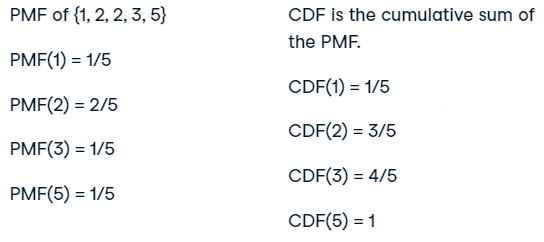

    ei BAAAAL er MODULE KAAJ KORE NA .STACK EO NAI. BAAL TAR Cdf ar Pmf er value same thake. Baaal ekta

In [94]:
cdf_age = Cdf(age)
print(cdf_age)

0        26.0
1        38.0
2        57.0
3        61.0
4        59.0
         ... 
62461    32.0
62462    61.0
62463    67.0
62464    57.0
62465    56.0
Name: , Length: 62466, dtype: float64


## 16.2.3//Comparing distribution

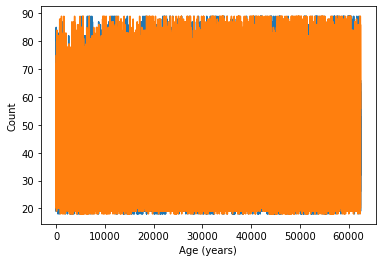

In [95]:
male = gss['sex'] == 1
age = gss['age']
male_age = age[male]
female_age = age[~male]
Pmf(male_age).plot(label='Male')
Pmf(female_age).plot(label='Female')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

**Cdf and Pmf not working**

## 16.2.4//Modeling distributions
This process is called kernel density estimation, or KDE. It's a way of getting from a PMF, a probability mass function, to a PDF, a probability density function

#### E//Distribution of income
In many datasets, the distribution of income is approximately lognormal, which means that the logarithms of the incomes fit a normal distribution. We'll see whether that's true for the GSS data. As a first step, you'll compute the mean and standard deviation of the log of incomes using NumPy's np.log10() function.

Then, you'll use the computed mean and standard deviation to make a norm object using the scipy.stats.norm() function.

**Extract 'realinc' from gss and compute its logarithm using np.log10().///
Compute the mean and standard deviation of the result.///
Make a norm object by passing the computed mean and standard deviation to norm().**

In [97]:
# Extract realinc and compute its log
income = gss['realinc']
log_income = np.log10(income)

# Compute mean and standard deviation
mean = log_income.mean()
std = log_income.std()
print(mean, std)

# Make a norm object
from scipy.stats import norm
dist = norm(mean,std)

4.371148677933652 0.4290082383271419


#### E2//Comparing CDFs
To see whether the distribution of income is well modeled by a lognormal distribution, we'll compare the CDF of the logarithm of the data to a normal distribution with the same mean and standard deviation.
dist is a scipy.stats.norm object with the same mean and standard deviation as the data. It provides .cdf(), which evaluates the normal cumulative distribution function.

Be careful with capitalization: Cdf(), with an uppercase C, creates Cdf objects. dist.cdf(), with a lowercase c, evaluates the normal cumulative distribution function.

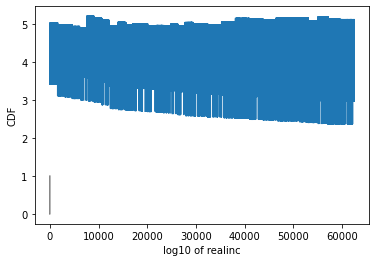

In [102]:
# Evaluate the model CDF
xs = np.linspace(2, 5.5)
ys = dist.cdf(xs)

# Plot the model CDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Create and plot the Cdf of log_income
Cdf.plot(log_income)
Cdf(log_income).plot()
# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')
plt.show()

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 16.3.1//Exploring relationships
A common way to visualize the relationship between two variables is a scatter plot. Scatter plots are common and readily understood, but they are surprisingly hard to get right. <i>Jittering:</i>Adding random noise like this is called "jittering". 


In [4]:
brfss=pd.read_hdf('G:\\datacamp\\16. Exploratory Data Analysis\\brfss.hdf5')
print(brfss.columns)

Index(['SEX', 'HTM4', 'WTKG3', 'INCOME2', '_LLCPWT', '_AGEG5YR', '_VEGESU1',
       '_HTMG10', 'AGE'],
      dtype='object')


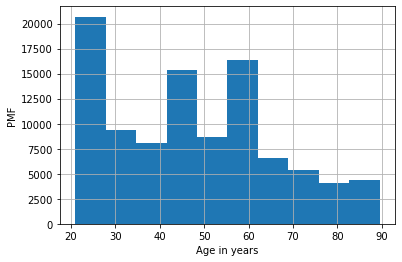

In [8]:
# Extract age
age = brfss['AGE']
weight=brfss['WTKG3']
age.hist()
# Label the axes
plt.xlabel('Age in years')
plt.ylabel('PMF')
plt.show()

In [9]:
size_age_dist=brfss['AGE'].value_counts()/brfss.shape[0]
size_age_dist=size_age_dist.reset_index()
size_age_dist.columns=(['age','age_prob'])
size_age_dist.head()

,age,age_prob
0,21.0,0.12566
1,32.0,0.09321
2,52.0,0.08652
3,57.0,0.08200
4,62.0,0.08182


#### E//PMF of age(OWN)
Do people tend to gain weight as they get older? We can answer this question by visualizing the relationship between weight and age. But before we make a scatter plot, it is a good idea to visualize distributions one variable at a time. Here, you'll visualize age using a bar chart first. Recall that all PMF objects have a .bar() method to make a bar chart.

The BRFSS dataset includes a variable, 'AGE' (note the capitalization!), which represents each respondent's age. To protect respondents' privacy, ages are rounded off into 5-year bins. 'AGE' contains the midpoint of the bins.

<BarContainer object of 13 artists>

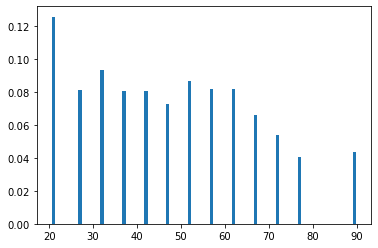

In [121]:
##own
plt.bar(size_age_dist['age'],size_age_dist['age_prob']) 

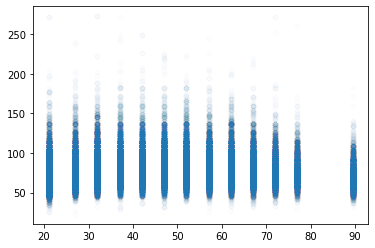

In [16]:
##own
plt.scatter(age,weight,alpha=.01,marker='o',s=22)
plt.show()

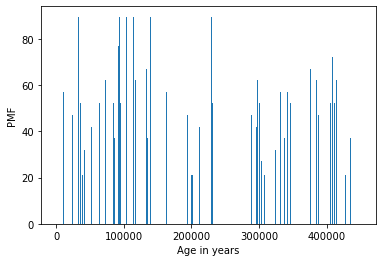

In [12]:
##              datacamp
## Datacap
# Extract age
age = brfss['AGE']

# Plot the PMF
pmf_age = Pmf(age)
pmf_age.bar()

# Label the axes
plt.xlabel('Age in years')
plt.ylabel('PMF')
plt.show()

pmf of age__dcmp
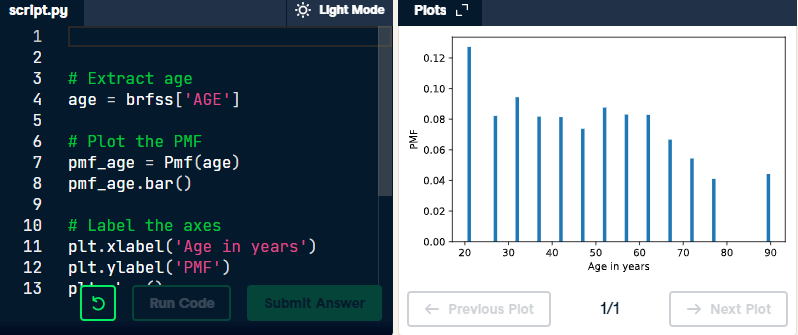

In [ ]:
#####            datacamp
# Select the first 1000 respondents
brfss = brfss[:1000]

# Extract age and weight
age = brfss['AGE']
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age,weight,'o',alpha=.1)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.show()

scatter___dcamp
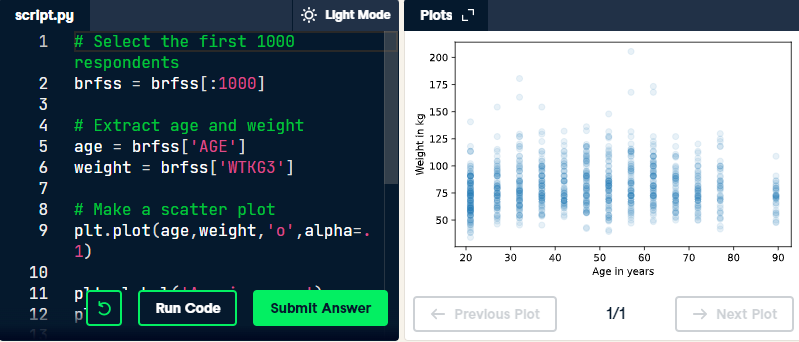

#### E//Jittering
In the previous exercise, the ages fall in columns because they've been rounded into 5-year bins. If we jitter them, the scatter plot will show the relationship more clearly. 

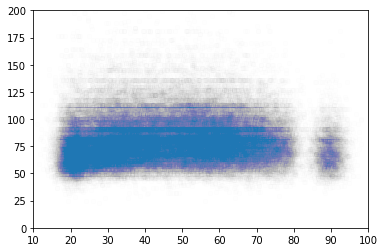

In [26]:
##### own
age_2 = brfss['AGE'] + np.random.normal(0,2.5,size=len(brfss))
plt.scatter(age_2,weight,alpha=.01/2,marker='o',s=25)
plt.axis([10, 100, 0, 200])                          ####plt.axis
plt.show()

In [ ]:
#### datacamp
# Select the first 1000 respondents
brfss = brfss[:1000]


# Add jittering to age
age = brfss['AGE'] + np.random.normal(0,2.5,size=len(brfss))
# Extract weight
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age,weight,'o',alpha=.2)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

datacamp result pic scatter
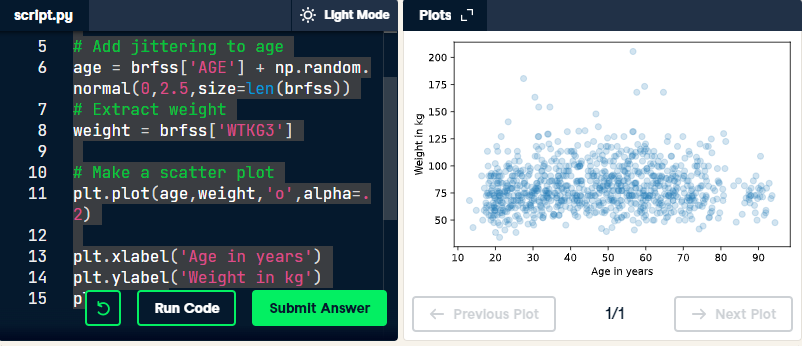

## 3.2// Visualizing Relationship
#### E1//Height and weight
Previously we looked at a scatter plot of height and weight, and saw that taller people tend to be heavier. Now let's take a closer look using a box plot. The brfss DataFrame contains a variable '_HTMG10' that represents height in centimeters, binned into 10 cm groups.

Recall how Allen created the box plot of 'AGE' and 'WTKG3' in the video, with the y-axis on a logarithmic scale:

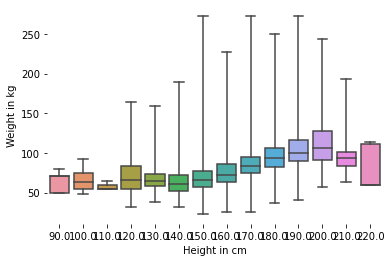

In [29]:
import seaborn as sns
# Drop rows with missing data
data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])
 
# Make a box plot
sns.boxplot(x='_HTMG10',y='WTKG3',whis=10,data=data)
 
# Plot the y-axis on a log scale
#####plt.yscale('log')                        ##### ?????
 
# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

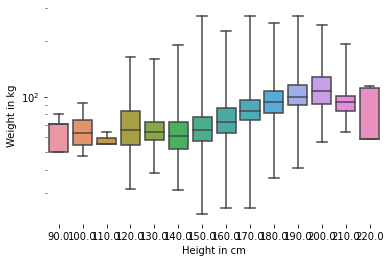

In [30]:
# Drop rows with missing data
data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])
 
# Make a box plot
sns.boxplot(x='_HTMG10',y='WTKG3',whis=10,data=data)
 
# Plot the y-axis on a log scale
plt.yscale('log')         ##For data that skews toward higher values, it is sometimes useful to look at it on a logarithmic
                              ##### scale. We can do that with the pyplot function yscale(). 
# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

**###so>>how to identify skewed data in boxplot??**
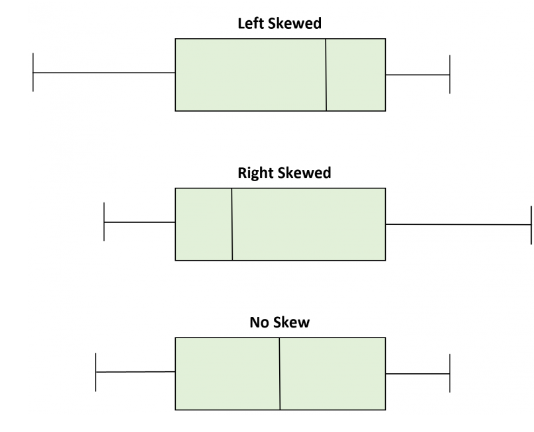

#### E2//Distribution of income
In the next two exercises we'll look at relationships between income and other variables. In the BRFSS, income is represented as a categorical variable; that is, respondents are assigned to one of 8 income categories. The variable name is 'INCOME2'. Before we connect income with anything else, let's look at the distribution by computing the PMF. Recall that all Pmf objects have a .bar() method.

In [78]:
brfss['INCOME2'].value_counts()

8.0    28112
7.0    12219
6.0    10914
5.0     8694
4.0     7650
3.0     6414
1.0     5067
2.0     4377
Name: INCOME2, dtype: int64

In [75]:
income=pd.DataFrame(brfss['INCOME2'].value_counts()/brfss.shape[0])
income=income.reset_index()
income.columns=(['value','prob'])
income

,value,prob
0,8.0,0.28112
1,7.0,0.12219
2,6.0,0.10914
3,5.0,0.08694
4,4.0,0.07650
5,3.0,0.06414
6,1.0,0.05067
7,2.0,0.04377


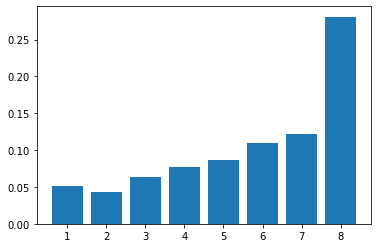

In [76]:
plt.bar(income['value'],income['prob'])
plt.show()

### baaalta
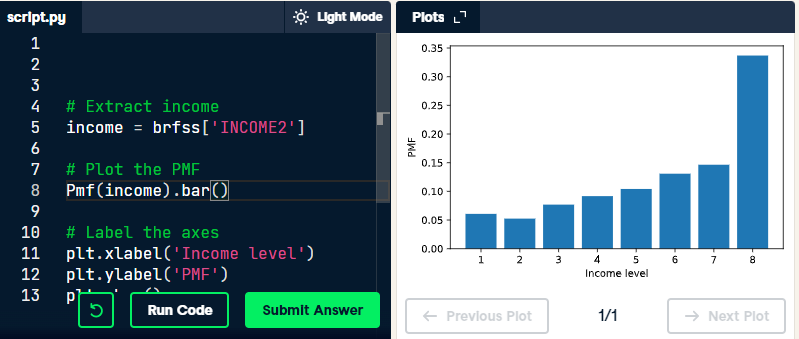

#### E3///Income and height
Let's now use a violin plot to visualize the relationship between income and height.

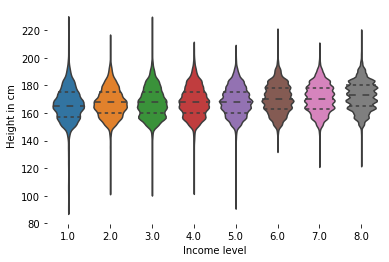

In [86]:
# Drop rows with missing data
data = brfss.dropna(subset=['INCOME2', 'HTM4'])

# Make a violin plot
sns.violinplot(y='HTM4',x='INCOME2',data=data,inner='quartile')

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.show()

**inner{“box”, “quartile”, “point”, “stick”, None}, optional
Representation of the datapoints in the violin interior. If box, draw a miniature boxplot. If quartiles, draw the quartiles of the distribution. If point or stick, show each underlying datapoint. Using None will draw unadorned violins**

## 16.3.3//Correlation
In statistics, it usually means Pearson's correlation coefficient, which is a number between -1 and 1 that quantifies the strength of a linear relationship between variables. correlation only works for linear relationships. If the relationship is nonlinear, correlation generally underestimates how strong it is. 

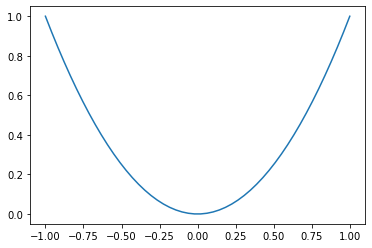

array([[ 1.00000000e+00, -4.86224456e-17],
       [-4.86224456e-17,  1.00000000e+00]])

In [88]:
xs = np.linspace(-1, 1)
ys = xs**2
#ys += normal(0, 0.05, len(xs))
plt.plot(xs,ys)
plt.show()
np.corrcoef(xs, ys)

here, there is obviously a strong relationship. but corr can not determine

#### Computing correlations
The purpose of the BRFSS is to explore health risk factors, so it includes questions about diet. The variable '_VEGESU1' represents the number of servings of vegetables respondents reported eating per day.

Let's see how this variable relates to age and income.

In [92]:
# Select columns
columns = ['AGE','INCOME2','_VEGESU1']
subset = brfss[columns]

# Compute the correlation matrix
print(subset.corr())

               AGE   INCOME2  _VEGESU1
AGE       1.000000 -0.015158 -0.009834
INCOME2  -0.015158  1.000000  0.119670
_VEGESU1 -0.009834  0.119670  1.000000


## 16.3.4//Simple regression
However, linear regression has the same problem as correlation; it only measures the strength of a linear relationship
#### E//Income and vegetables
As we saw in a previous exercise, the variable '_VEGESU1' represents the number of vegetable servings respondents reported eating per day.

Let's estimate the slope of the relationship between vegetable consumption and income.

In [119]:
from scipy.stats import linregress

# Extract the variables
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']

# Compute the linear regression
res = linregress(xs,ys)
print(res)    ##rvalue=corr

LinregressResult(slope=0.06988048092105006, intercept=1.5287786243363113, rvalue=0.11967005884864092, pvalue=1.378503916249654e-238, stderr=0.0021109763563323305, intercept_stderr=0.013196467544093591)


In [91]:
help(linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None, alternative='two-sided')
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.  If
        only `x` is given (and ``y=None``), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension. In
        the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
        equivalent to ``linregress(x[0], x[1])``.
    alternative : {'two-sided', 'less', 'greater'}, optional
        Defines the alternative hypothesis. Default is 'two-sided'.
        The following options are available:
    
        * 'two-sided': the slope of the regression line is nonzero
        * 'less': the slope of the regression line is l

**<u><i>slope:**</u></i>
**<u><i>standard error(stderr):**</u></i> Standard errors for regression are measures of how spread out your y variables are around the mean, μ.The standard error of the regression slope, s (also called the standard error of estimate) represents the average distance that your observed values deviate from the regression line. The smaller the “s” value, the closer your values are to the regression line.The standard error of the regression is particularly useful because it can be used to assess the precision of predictions. Roughly 95% of the observation should fall within +/- two standard error of the regression, which is a quick approximation of a 95% prediction interval. <br>
<u><i>**standard error of the the intercept(intercept_stderr):**</u></i>The standard error of the the intercept allows you to test whether or not the estimated intercept is statistically significant from a specified(hypothesized) value ...normally 0.0 . If you test against 0.0 and fail to reject then you can then re-estimate your model without the intercept term being present.  https://stats.stackexchange.com/questions/173271/what-exactly-is-the-standard-error-of-the-intercept-in-multiple-regression-analy#:~:text=The%20standard%20error%20of%20the%20the%20intercept%20allows%20you%20to,the%20intercept%20term%20being%20present.

#### e2//Fit a line
Continuing from the previous exercise:

Assume that xs and ys contain income codes and daily vegetable consumption, respectively, and

res contains the results of a simple linear regression of ys onto xs.

Now, you're going to compute the line of best fit. NumPy has been imported for you as np

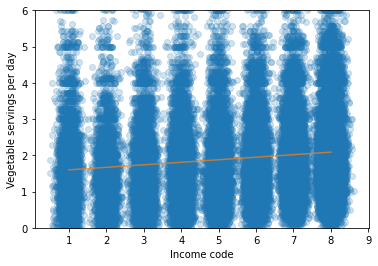

In [114]:
# Plot the scatter plot
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)

# Plot the line of best fit
fx = np.array([xs.min(),xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


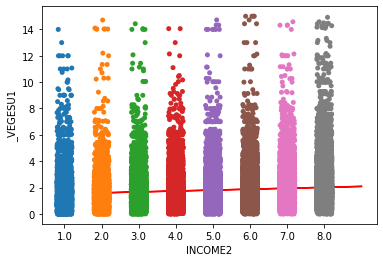

In [127]:
plt.clf()
sns.stripplot(xs,ys,jitter=.2)
plt.plot(xs,res.intercept + res.slope * xs,'r')  ####res.intercept + res.slope * xs
plt.show()

### help(linregress) theke nicher gula---

In [106]:
from scipy import stats
rng = np.random.default_rng()  
x = rng.random(10)
y = 1.6*x + rng.random(10)

    #Perform the linear regression:
    
res = stats.linregress(x, y)
    
#Coefficient of determination (R-squared):
    
print(f"R-squared: {res.rvalue**2:.6f}")
print(res.rvalue**2)
print(res.intercept + res.slope*x)

R-squared: 0.680418
0.6804179422150693
[1.8764213  0.81941452 1.58017685 0.87904972 2.02089602 0.78368118
 1.01432939 0.96686273 0.48849424 2.04346747]


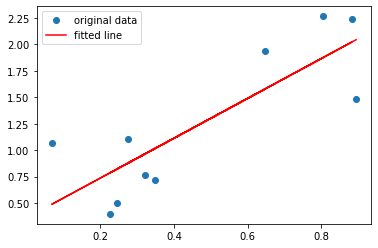

In [108]:
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

In [103]:
help(res.intercept)

Help on float64 object:

class float64(floating, builtins.float)
 |  float64(x=0, /)
 |  
 |  Double-precision floating-point number type, compatible with Python `float`
 |  and C ``double``.
 |  
 |  :Character code: ``'d'``
 |  :Canonical name: `numpy.double`
 |  :Alias: `numpy.float_`
 |  :Alias on this platform (Windows AMD64): `numpy.float64`: 64-bit precision floating-point number type: sign bit, 11 bits exponent, 52 bits mantissa.
 |  
 |  Method resolution order:
 |      float64
 |      floating
 |      inexact
 |      number
 |      generic
 |      builtins.float
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __abs__(self, /)
 |      abs(self)
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __bool__(self, /)
 |      True if self else False
 |  
 |  __divmod__(self, value, /)
 |      Return divmod(self, value).
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __float__(self, /)
 |      float(self)
 |  
 |  __floordiv__(s

# 16.4// Multivariate Thinking
## 16.4.1// Limits of simple regression
Regression is not symmetric. left----vegetable is a function of income.The slope of the line is 0.7, which means that the difference between the lowest and highest income brackets is about 0.49 servings per day.<br>right---- income s a  function of vegetable consumption. here vegetable consumption is known and income is being predicted.slope 0.23.which means that the difference between 0 and 8 servings per day is about 2 income codes, roughly from code 5 to code 7. If we check the codebook, income code 5 is about 30,000 per year; income code 7 is about $65,000.

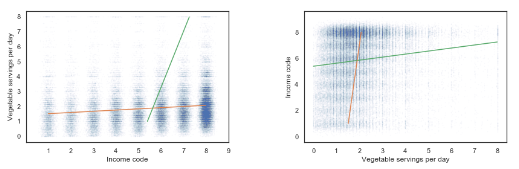
This example shows that regression is not symmetric; the regression of A onto B is not the same as the regression of B onto A.<br>We can see that more clearly by putting the two figures side by side and plotting both regression lines on both figures. On the left, we treat income as a known quantity and vegetable consumption as random. On the right, vegetable consumption is known and income is random. When you run a regression model, you make decisions about how to treat the data, and those decisions affect the result you get.<br>This example is meant to demonstrate another point, which is that regression doesn't tell you much about causation. If you think people with lower income can't afford vegetables, you might look at the figure on the left and conclude that it doesn't make much difference. If you think better diet increases income, the figure on the right might make you think it does. But in general, regression can't tell you what causes what. In this example, A might cause B, or B might cause A, or there might be other factors that cause both A and B. Regression alone can't tell you which way it goes.<br>

## Multiple regression
 SciPy doesn't do multiple regression, so we have to switch to a new library, StatsModels.
#### Using StatsModels
Let's run the same regression using SciPy and StatsModels, and confirm we get the same resul
**e1///Compute the regression of '_VEGESU1' as a function of 'INCOME2' using SciPy's linregress().<br>e2///
Compute the regression of '_VEGESU1' as a function of 'INCOME2' using StatsModels' smf.ols().**

In [128]:
#`ols` stands for "ordinary least squares", another name for regression
from scipy.stats import linregress
import statsmodels.formula.api as smf

# Run regression with linregress
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
res = linregress(xs,ys)
print(res)

# Run regression with StatsModels
results = smf.ols('_VEGESU1 ~ INCOME2', data = brfss).fit()
print(results.params)

LinregressResult(slope=0.06988048092105006, intercept=1.5287786243363113, rvalue=0.11967005884864092, pvalue=1.378503916249654e-238, stderr=0.0021109763563323305, intercept_stderr=0.013196467544093591)
Intercept    1.528779
INCOME2      0.069880
dtype: float64


## 16.4.2// Multippe regression
#### e//Plot income and education
To get a closer look at the relationship between income and education, let's use the variable 'educ' to group the data, then plot mean income in each group.
Here, the GSS dataset has been pre-loaded into a DataFrame called gss.

**Group gss by 'educ'. Store the result in grouped.<br>
From grouped, extract 'realinc' and compute the mean.<br>
Plot mean_income_by_educ as a scatter plot. Specify 'o' and alpha=0.5.**

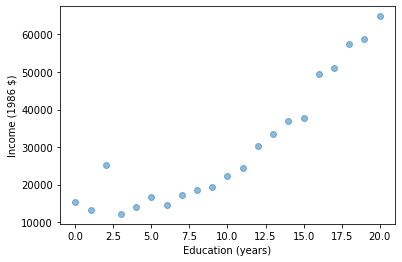

In [131]:
# Group by educ
grouped = gss.groupby('educ')

# Compute mean income in each group
mean_income_by_educ = grouped['realinc'].mean()

# Plot mean income as a scatter plot
plt.plot(mean_income_by_educ,'o',alpha=.5)

# Label the axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.show()

#### e2//Non-linear model of education
The graph in the previous exercise suggests that the relationship between income and education is non-linear. So let's try fitting a non-linear model.

In [133]:
import statsmodels.formula.api as smf

# Add a new column with educ squared
gss['educ2'] = gss['educ']**2
gss['age2']=gss['age']**2
# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ+educ2+age+age2',data=gss).fit()

# Print the estimated parameters
print(results.params)

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64


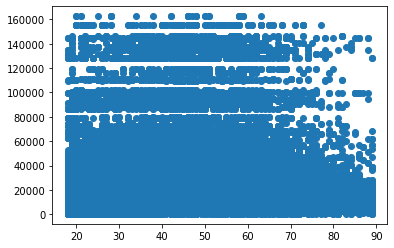

In [142]:
plt.plot(gss['age'],gss['realinc'],'o')
plt.show()  ##no need. emni korsi

## 16.4.3//Visualizing regression results
sometimes the best way to understand a model is by looking at its predictions rather than its parameters.

The regression results object provides a method called predict() that uses the model to generate predictions. It takes a DataFrame as a parameter and returns a Series with a prediction for each row in the DataFrame. The result from predict() is a Series with one prediction for each row

In [146]:
print(gss.columns)
mean_income_by_age=gss.groupby('age')['realinc'].mean()

Index(['year', 'age', 'cohort', 'sex', 'race', 'educ', 'realinc', 'gunlaw',
       'grass', 'wtssall', 'educ2', 'age2'],
      dtype='object')


0    18422.699989
1    19864.036105
2    21241.067963
3    22553.795565
4    23802.218909
dtype: float64


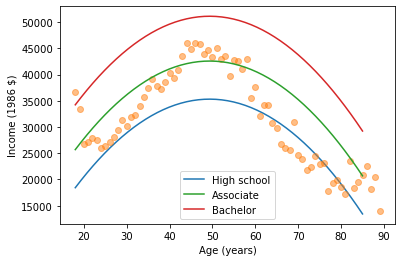

In [156]:
df = pd.DataFrame()
df['age'] = np.linspace(18, 85)
df['age2'] = df['age']**2
df['educ'] = 12
df['educ2'] = df['educ']**2
pred12 = results.predict(df)
print(pred12.head())
plt.plot(df['age'], pred12, label='High school')
plt.plot(mean_income_by_age, 'o', alpha=0.5)
plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
df['educ'] = 14
df['educ2'] = df['educ']**2
pred14 = results.predict(df)
plt.plot(df['age'], pred14, label='Associate')
df['educ'] = 16
df['educ2'] = df['educ']**2
pred16 = results.predict(df)
plt.plot(df['age'], pred16, label='Bachelor')
plt.legend()

In [155]:
df = pd.DataFrame()
df['age'] = np.linspace(18, 85)
df['age2'] = df['age']**2
df['educ_12'] = 12
df['educ2_12'] = df['educ_12']**2
pred12 = results.predict(df)
print(pred12.head())
plt.plot(df['age'], pred12, label='High school')
plt.plot(mean_income_by_age, 'o', alpha=0.5)
plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
df['educ_14'] = 14
df['educ2_14'] = df['educ_14']**2
pred14 = results.predict(df)
plt.plot(df['age'], pred14, label='Associate')
df['educ_16'] = 16
df['educ2_16'] = df['educ_16']**2
pred16 = results.predict(df)
plt.plot(df['age'], pred16, label='Bachelor')
plt.legend()

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'educ' is not defined
    realinc ~ educ+educ2+age+age2
              ^^^^

#### E//Making predictions
At this point, we have a model that predicts income using age, education, and sex.

Let's see what it predicts for different levels of education, holding age constant.

In [168]:
# Run a regression model with educ, educ2, age, and age2
results_2 = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# Make the DataFrame
df_2 = pd.DataFrame()
df_2['educ'] = np.linspace(0,20)
df_2['age'] = 30
df_2['educ2'] = df_2['educ']**2
df_2['age2'] = df_2['age']**2

# Generate and plot the predictions
pred_2 = results_2.predict(df_2)
print(pred.head())
#df_2

0    63039.293059
1    61944.991697
2    60786.386079
3    59563.476204
4    58276.262072
dtype: float64


,educ,age,educ2,age2
0,0.000000,30,0.000000,900
1,0.408163,30,0.166597,900
2,0.816327,30,0.666389,900
3,1.224490,30,1.499375,900
4,1.632653,30,2.665556,900
5,2.040816,30,4.164931,900
6,2.448980,30,5.997501,900
7,2.857143,30,8.163265,900
8,3.265306,30,10.662224,900
9,3.673469,30,13.494377,900


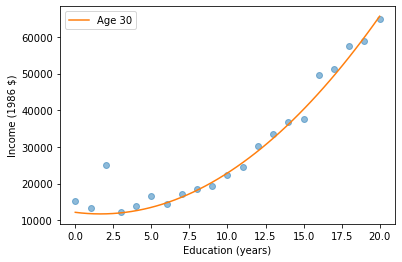

In [166]:
# Plot mean income in each age group
plt.clf()
grouped = gss.groupby('educ')
mean_income_by_educ = grouped['realinc'].mean()
plt.plot(mean_income_by_educ,'o',alpha=.5)

# Plot the predictions
pred_2= results_2.predict(df_2)
plt.plot(df_2['educ'], pred_2, label='Age 30')

# Label axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

## 16.4.4// Loistic regression
category variable
#### Predicting a binary variable
Let's use logistic regression to predict a binary variable. Specifically, we'll use age, sex, and education level to predict support for legalizing cannabis (marijuana) in the U.S.

In the GSS dataset, the variable grass records the answer to the question "Do you think the use of marijuana should be made legal or not?"

**e1//Fill in the parameters of smf.logit() to predict grass using the variables age, age2, educ, and educ2, along with sex as a categorical variable.<br>e2//

In [201]:
gss.columns
gss[['age','age2','educ','educ2','sex']]

,age,age2,educ,educ2,sex
0,26.0,676.0,18.0,324.0,1
1,38.0,1444.0,12.0,144.0,2
2,57.0,3249.0,12.0,144.0,1
3,61.0,3721.0,14.0,196.0,2
4,59.0,3481.0,12.0,144.0,1
...,...,...,...,...,...
62461,32.0,1024.0,13.0,169.0,1
62462,61.0,3721.0,16.0,256.0,2
62463,67.0,4489.0,13.0,169.0,2
62464,57.0,3249.0,12.0,144.0,2


In [192]:
 # Recode grass
gss['grass'].replace(2, 0, inplace=True)

# Run logistic regression
results_3 = smf.logit('grass ~ age+age2+educ+educ2+C(sex)',data=gss).fit()
results_3.params

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6


Intercept     -1.685223
C(sex)[T.2]   -0.384611
age           -0.034756
age2           0.000192
educ           0.221860
educ2         -0.004163
dtype: float64

**Add a column called educ and set it to 12 years; then compute a second column, educ2, which is the square of educ

In [189]:

# Make a DataFrame with a range of ages
df_3 = pd.DataFrame()
df_3['age'] = np.linspace(18, 89)
df_3['age2'] = df_3['age']**2

# Set the education level to 12
df_3['educ'] = 12
df_3['educ2'] = df_3['educ']**2
df_3.head()

,age,age2,educ,educ2
0,18.000000,324.000000,12,144
1,19.448980,378.262807,12,144
2,20.897959,436.724698,12,144
3,22.346939,499.385673,12,144
4,23.795918,566.245731,12,144


**Generate separate predictions for men and women.

In [190]:
# Generate predictions for men and women
df_3['sex'] = 1
pred1_3 = results_3.predict(df_3)

df_3['sex'] = 2
pred2_3 = results_3.predict(df_3)
df_3.head()

,age,age2,educ,educ2,sex
0,18.000000,324.000000,12,144,2
1,19.448980,378.262807,12,144,2
2,20.897959,436.724698,12,144,2
3,22.346939,499.385673,12,144,2
4,23.795918,566.245731,12,144,2


**Fill in the missing code to compute the mean of 'grass' for each age group, and then the arguments of plt.plot() to plot pred2 versus df['age'] with the label 'Female'.

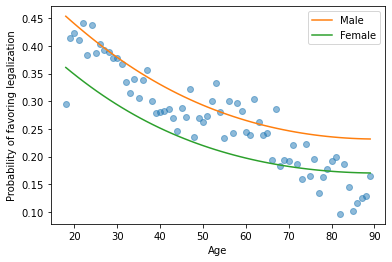

In [191]:
plt.clf()
grouped = gss.groupby('age')
favor_by_age = grouped['grass'].mean()
plt.plot(favor_by_age, 'o', alpha=0.5)

plt.plot(df_3['age'], pred1_3, label='Male')
plt.plot(df_3['age'], pred2_3, label='Female')

plt.xlabel('Age')
plt.ylabel('Probability of favoring legalization')
plt.legend()
plt.show()

## 16.4.5
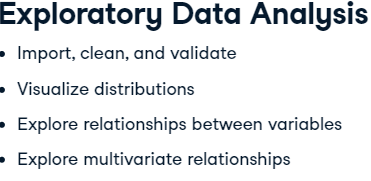

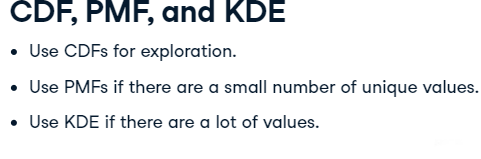


In [ ]:
pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install